    x z p_x     Fx  Fx_t m y p_m    Fm  Fm_t
aut 1 1   1  7.434 0.001 1 2   0 4.102 0.052
bel 1 1   0  4.904 0.021 1 1   0 3.719 0.080
fin 1 1   0  6.710 0.003 1 1   0 3.343 0.118
fra 1 1   0  5.806 0.007 1 1   0 1.028 0.564
deu 1 1   2  5.166 0.007 1 2   1 9.961 0.000
grc 1 0   0  1.594 0.614 1 1   0 1.818 0.753
irl 1 1   0 11.379 0.000 1 2   1 1.898 0.350
ita 1 1   0  6.643 0.003 1 2   0 3.620 0.074
nld 1 1   0 11.324 0.000 1 1   0 4.037 0.056
prt 1 1   0 10.639 0.001 1 2   0 5.688 0.009
esp 1 1   0 15.866 0.000 2 2   2 3.776 0.054
    A_x d(finco) diff(rpri)  ect_x A_x_t d(finco)_t diff(rpri)_t ect_x_t     Fx
aut   0    2.468      0.003 -0.234     0      8.837        0.013  -5.848  7.434
bel   0    2.091     -0.110 -0.245     0      7.178       -0.937  -4.014  4.904
fin   0    2.162     -0.026 -0.194     0      4.172       -0.084  -4.695  6.710
fra   0    1.740     -0.117 -0.170     0      5.181       -0.819  -4.368  5.806
deu   0    2.478     -0.098 -0.179     0      6.805       -0

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



HTML widgets cannot be represented in plain text (need html)

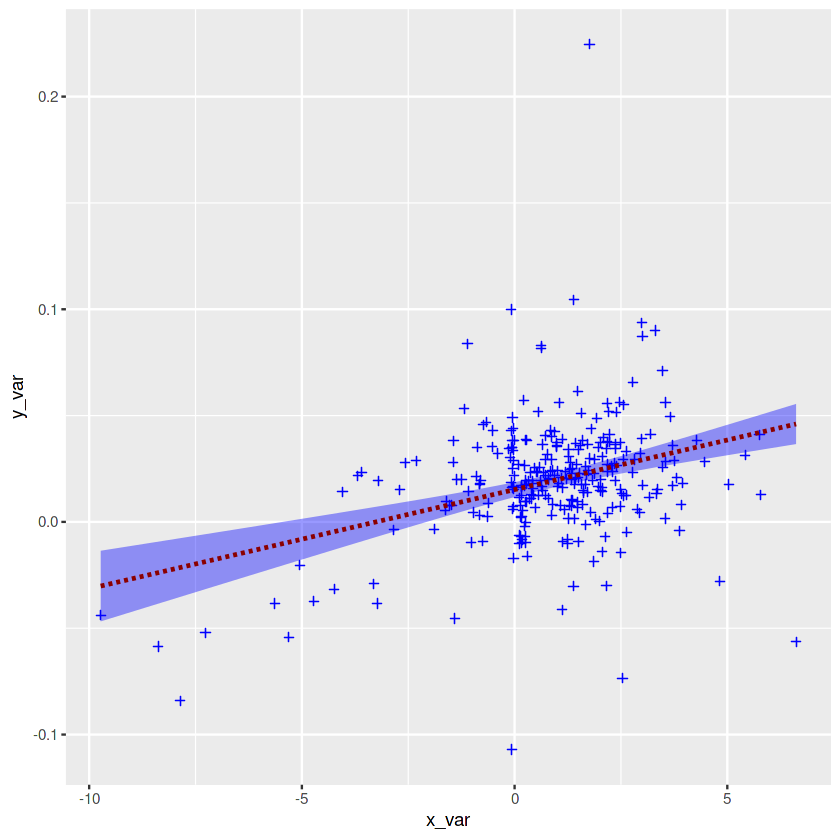

In [10]:
###### GDP GROTRWTH R. FORECASTS WITH THIRLWALL LAW ###########
options(jupyter.plot_mimetypes = 'image/png')
options(warns=-1)
relpath <- "/home/other/Desktop/ECONOMETRICS/RESULTS.112020"
source(paste0(relpath, "/MODELS/FINALx1.R"))
dummy_tot <- break_m
dummy_mean <- ((26 - dummy_tot) * dum_m) / 26
dummy_alt <- replicator_dummy(dummy_tot, 26)
elasticity_x_alt <- replicator(elasticity_x, 26)
elasticity_m_alt <- replicator(elasticity_m, 26)
ect_x_alt <- ect_x * residuos_x
ect_m_alt <- ect_x * residuos_x
dum_m_alt <- replicator(dum_m, 26)
const_x_alt <- replicator(const_x, 26)
const_m_alt <- replicator(const_m, 26)
elasticity_mreal <- data.frame(diff(LexportsDL)) / data.frame(diff(LincomeDL))
ngrowth_pool <- as.numeric(unlist(diff(LincomeDL)))
fgrowth <- as.data.frame(diff(LfincomeDL))
ngrowth <- as.data.frame(diff(LincomeDL))
fgrowth_mean <- growth_rate_log(LfincomeDL, 26)
ngrowth_mean <- growth_rate_log(LincomeDL, 26)
ect_m1 <- ect_m * growth_rate_prom(residuos_m) + trend_m
ect_x1 <- ect_x * growth_rate_prom(residuos_x) + trend_x
###### THIRLWALL'S LAW FORECASTS###########
tl_mean1 <- unname((elasticity_x * fgrowth_mean) / elasticity_m)
tl_mean2 <- unname((elasticity_x * fgrowth_mean + ect_x1 - ect_m1) / elasticity_m)
tl_mean3 <- unname((elasticity_x * fgrowth_mean + ect_x1 - ect_m1 - dummy_mean) / elasticity_m)
tl_mean4 <- unname((elasticity_x * fgrowth_mean - dummy_mean) / elasticity_m)
tl_tot_base <- unname((elasticity_x_alt * fgrowth / elasticity_m_alt))
tl_tot_int <- unname((elasticity_x_alt * fgrowth + ect_x_alt - ect_m_alt) / elasticity_m_alt)
tl_tot_int_dum <- unname((elasticity_x_alt * fgrowth + ect_x_alt - ect_m_alt - dum_m_alt * dummy_alt) / elasticity_m_alt)
tl_tot_dum <- unname((elasticity_x_alt * fgrowth - dum_m_alt * dummy_alt) / elasticity_m_alt)
final_rates_int <- rates_to_levels(tl_tot_int, 11)
final_rates_dum <- rates_to_levels(tl_tot_dum, 11)
final_rates_int_dum <- rates_to_levels(tl_tot_int_dum, 11)
final_rates <- rates_to_levels(tl_tot_base, 11)
tl_mean5 <- ave_growth_rate(final_rates, 26)
tl_mean6 <- ave_growth_rate(final_rates_int, 26)
tl_mean7 <- ave_growth_rate(final_rates_dum, 26)
tl_mean8 <- ave_growth_rate(final_rates_int_dum, 26)
tl_mean <- cbind(ngrowth_mean, tl_mean1, tl_mean2, tl_mean3, tl_mean4, tl_mean5, tl_mean6, tl_mean7, tl_mean8)
tl_pool <- sapply(final_rates_dum, function(i) {
  diff(as.numeric(i))
})
elasticity_mcombie <- data.frame(diff(LexportsDL)) / tl_pool
pooled_predictions <- cbind(unlist(as.numeric(tl_pool)), unlist(as.numeric(ngrowth_pool)))
tl_pool <- unlist(as.numeric(tl_pool))
swales_test <- summary(lm(ngrowth_pool ~ tl_pool))$coefficients
swales_model <- as.data.frame(rbind(swales_test, unname(summary(lm(tl_pool ~ ngrowth_pool))$coefficients)))
par(mfrow = c(2, 2))
widget_scatter(y_var = ngrowth_mean, x_var = tl_mean3)
widget_scatter(y_var = ngrowth_pool, x_var = tl_pool)
widget_scatter_gg(tl_mean, x_var = tl_mean3, y_var = ngrowth_mean)
widget_scatter_gg(pooled_predictions, x_var = tl_pool, y_var = ngrowth_pool)
#### COMPARACIÓN PREDICIONENS VS REALIDAD
widget_table(round(tl_mean, 3), 12)
comparison <- diff(as.ts(log(final_rates_dum))) - diff(LincomeDL)

HTML widgets cannot be represented in plain text (need html)

`geom_smooth()` using formula 'y ~ x'



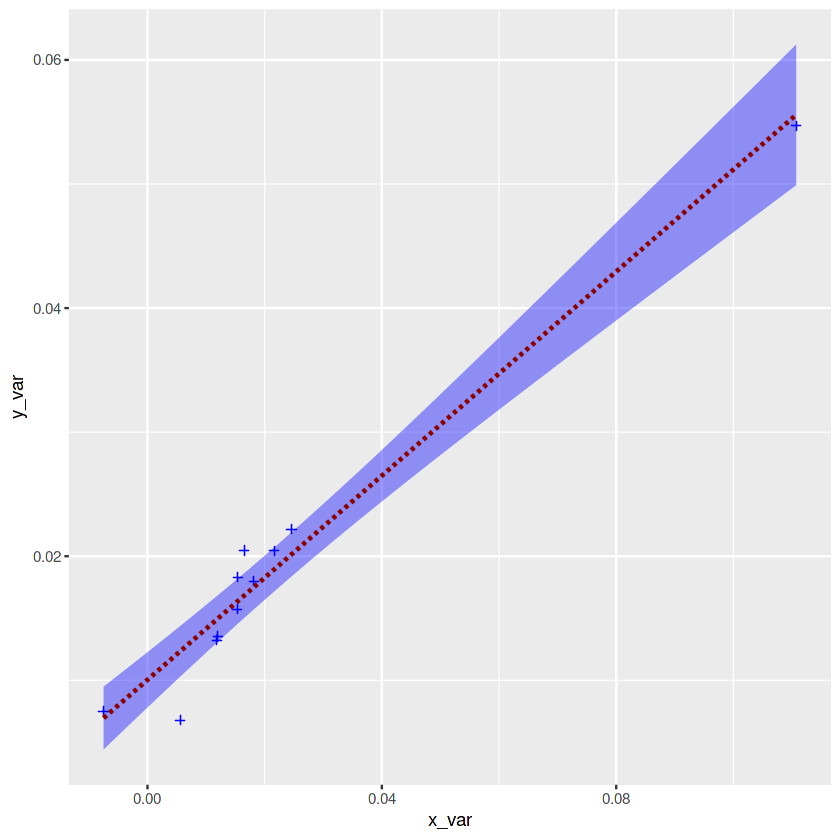

In [11]:
widget_table(round(coeff_results, 3), 12)
widget_scatter_gg(tl_mean, x_var = tl_mean3, y_var = ngrowth_mean)
